# WeatherPy

### Analysis

* __Observed Trend 1__: Although cities at Equator might not have the highest temperature, their temperatures remain high (around 80 F-Degree); North Sphere had more data when approaching the polar, this is due to the fact that there are barely any cities/countries existed passing the Antarctic Cirlcle (60ish degree) at the South Sphere. From the trend of "City Latitude vs. Max Temperature (03/17/18)" graph, the temperature climbs up when approaching from both side of the Polars to the Equator.
* __Observed Trend 2__: From graph "City Latitude vs Humidity (03/17/18)", humidities varies among cities even at the same Latitude. There are more than just latitude affecting the humidity (i.e. geographic location). However, we did saw that the humidity among cities around equator retain relatively moderate-to-high-humidity (40%-100%). This could mainly cause by the constant hot weather around equator area.  
* __Observed Trend 3__: From graph "City Latitude vs Wind Speed (03/17/18)", The wind speeds for cities around Equator below 20mph. However, temperature (due to the constantly high temperature around Equator) is just one of the many factors that affecting the Wind Speed. Thus the correlation might seems a bit low. 

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import random
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#Import API Key for  
from config import key

## Generate Cities List

In [2]:
#Latitudes range from -90 to 90.
#Longitudes range from -180 to 180.
# randomly select large pool of samples (10000) for Lat and Lon
# Later we can remove duplicates and randomly select another 500 sample from it
LatRand = np.random.choice(range(-90,90),10000)
LonRand = np.random.choice(range(-180,180),10000)

LatLon = pd.DataFrame({"Latitude":LatRand,"Longitude":LonRand})        
LatLon.head()

,Latitude,Longitude
0,-29,-106
1,55,-170
2,56,73
3,-17,-91
4,-46,158


In [3]:
# For the selected coordinates, use citipy to associate them with nearest city.

LatLon["Closest City name"] = ""
LatLon["Closest Country code"] = ""
for index,row in LatLon.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    LatLon.set_value(index,"Closest City name",city.city_name)
    LatLon.set_value(index,"Closest Country code",city.country_code.upper())

In [4]:
# Per Instruction, There has to be at least 500 unique (non-repeat) cities 

# Remove any duplicate cities

ULatLon = LatLon.dropna()
ULatLon = ULatLon.drop_duplicates()

# Picking a sample of 666 cities to proceed with analysis
SampCities = ULatLon.sample(666)
SampCities =SampCities.reset_index()
SampCities = SampCities.iloc[:,[3,4]]
SampCities.head()

,Closest City name,Closest Country code
0,saskylakh,RU
1,yellowknife,CA
2,russell,NZ
3,saint george,BM
4,mataura,PF


## Perform API Calls

In [5]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :key,"units":"imperial" }

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

# loop throught the Cities and append them to a dataframe
for index,row in SampCities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Processing Record {index+1} of {len(SampCities)} | for City,Country: {params['q']}")
    CWResp = requests.get(url,params)
    print(CWResp.url)
    CWRespJson = CWResp.json()
#Sample Json Response
#{"coord":
#{"lon":145.77,"lat":-16.92},
#"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],
#"base":"cmc stations",
#"main":{"temp":293.25,"pressure":1019,"humidity":83,"temp_min":289.82,"temp_max":295.37},
#"wind":{"speed":5.1,"deg":150},
#"clouds":{"all":75},
#"rain":{"3h":3},
#"dt":1435658272,
#"sys":{"type":1,"id":8166,"message":0.0166,"country":"AU","sunrise":1435610796,"sunset":1435650870},
#"id":2172797,
#"name":"Cairns",
#"cod":200}
    SampCities.set_value(index,"Latitude",CWRespJson.get("coord",{}).get("lat"))
    SampCities.set_value(index,"Longitude",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Temperature",CWRespJson.get("coord",{}).get("lon"))
    SampCities.set_value(index,"Max Temp",CWRespJson.get("main",{}).get("temp_max"))
    SampCities.set_value(index,"Wind speed",CWRespJson.get("wind",{}).get("speed"))
    SampCities.set_value(index,"Humidity",CWRespJson.get("main",{}).get("humidity"))
    SampCities.set_value(index,"Cloudiness",CWRespJson.get("clouds",{}).get("all"))
    SampCities.set_value(index,"Date",CWRespJson.get("dt"))


print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 666 | for City,Country: saskylakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saskylakh%2CRU
Processing Record 2 of 666 | for City,Country: yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=yellowknife%2CCA
Processing Record 3 of 666 | for City,Country: russell,NZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=russell%2CNZ
Processing Record 4 of 666 | for City,Country: saint george,BM
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saint+george%2CBM
Processing Record 5 of 666 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CP

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hasaki%2CJP
Processing Record 47 of 666 | for City,Country: hithadhoo,MV
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hithadhoo%2CMV
Processing Record 48 of 666 | for City,Country: victoria,SC
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=victoria%2CSC
Processing Record 49 of 666 | for City,Country: nishihara,JP
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=nishihara%2CJP
Processing Record 50 of 666 | for City,Country: clyde river,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=clyde+river%2CCA
Processing Record 51 of 666 | for City,Country: hasaki,JP
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hasaki

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=guerrero+negro%2CMX
Processing Record 94 of 666 | for City,Country: zhuanghe,CN
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=zhuanghe%2CCN
Processing Record 95 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 96 of 666 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=albany%2CAU
Processing Record 97 of 666 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=punta+arenas%2CCL
Processing Record 98 of 666 | for City,Country: nemuro,JP
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=nemuro

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=portland%2CAU
Processing Record 140 of 666 | for City,Country: illoqqortoormiut,GL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=illoqqortoormiut%2CGL
Processing Record 141 of 666 | for City,Country: dubenskiy,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=dubenskiy%2CRU
Processing Record 142 of 666 | for City,Country: puerto ayora,EC
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=puerto+ayora%2CEC
Processing Record 143 of 666 | for City,Country: skjervoy,NO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=skjervoy%2CNO
Processing Record 144 of 666 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b141549

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=san+patricio%2CMX
Processing Record 187 of 666 | for City,Country: turayf,SA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=turayf%2CSA
Processing Record 188 of 666 | for City,Country: thompson,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=thompson%2CCA
Processing Record 189 of 666 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 190 of 666 | for City,Country: rikitea,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=rikitea%2CPF
Processing Record 191 of 666 | for City,Country: hobart,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hobart%2CAU
Process

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=chisinau%2CMD
Processing Record 233 of 666 | for City,Country: san policarpo,PH
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=san+policarpo%2CPH
Processing Record 234 of 666 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kapaa%2CUS
Processing Record 235 of 666 | for City,Country: tuktoyaktuk,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tuktoyaktuk%2CCA
Processing Record 236 of 666 | for City,Country: new norfolk,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=new+norfolk%2CAU
Processing Record 237 of 666 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=i

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=alofi%2CNU
Processing Record 279 of 666 | for City,Country: klyuchi,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=klyuchi%2CRU
Processing Record 280 of 666 | for City,Country: faya,TD
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=faya%2CTD
Processing Record 281 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 282 of 666 | for City,Country: georgetown,SH
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=georgetown%2CSH
Processing Record 283 of 666 | for City,Country: haywards heath,GB
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=haywards+hea

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ilulissat%2CGL
Processing Record 326 of 666 | for City,Country: inhambane,MZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=inhambane%2CMZ
Processing Record 327 of 666 | for City,Country: chokurdakh,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=chokurdakh%2CRU
Processing Record 328 of 666 | for City,Country: harper,LR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=harper%2CLR
Processing Record 329 of 666 | for City,Country: yar-sale,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=yar-sale%2CRU
Processing Record 330 of 666 | for City,Country: bredasdorp,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=br

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=la+tuque%2CCA
Processing Record 372 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
Processing Record 373 of 666 | for City,Country: qabis,TN
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=qabis%2CTN
Processing Record 374 of 666 | for City,Country: camacha,PT
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=camacha%2CPT
Processing Record 375 of 666 | for City,Country: punta arenas,CL
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=punta+arenas%2CCL
Processing Record 376 of 666 | for City,Country: hamilton,BM
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hamilton%

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ahipara%2CNZ
Processing Record 419 of 666 | for City,Country: sao joao da barra,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=sao+joao+da+barra%2CBR
Processing Record 420 of 666 | for City,Country: kapaa,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=kapaa%2CUS
Processing Record 421 of 666 | for City,Country: vaini,TO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=vaini%2CTO
Processing Record 422 of 666 | for City,Country: hilo,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hilo%2CUS
Processing Record 423 of 666 | for City,Country: oriximina,BR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=oriximina

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=severo-kurilsk%2CRU
Processing Record 465 of 666 | for City,Country: yauya,PE
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=yauya%2CPE
Processing Record 466 of 666 | for City,Country: butaritari,KI
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=butaritari%2CKI
Processing Record 467 of 666 | for City,Country: cape town,ZA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=cape+town%2CZA
Processing Record 468 of 666 | for City,Country: zhigansk,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=zhigansk%2CRU
Processing Record 469 of 666 | for City,Country: yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=westport%2CNZ
Processing Record 512 of 666 | for City,Country: vaini,TO
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=vaini%2CTO
Processing Record 513 of 666 | for City,Country: husavik,IS
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=husavik%2CIS
Processing Record 514 of 666 | for City,Country: avarua,CK
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=avarua%2CCK
Processing Record 515 of 666 | for City,Country: pisco,PE
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=pisco%2CPE
Processing Record 516 of 666 | for City,Country: ajoloapan,MX
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ajoloapan%2CMX
Processin

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=maun%2CBW
Processing Record 558 of 666 | for City,Country: mataura,PF
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mataura%2CPF
Processing Record 559 of 666 | for City,Country: olafsvik,IS
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=olafsvik%2CIS
Processing Record 560 of 666 | for City,Country: henties bay,NA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=henties+bay%2CNA
Processing Record 561 of 666 | for City,Country: yellowknife,CA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=yellowknife%2CCA
Processing Record 562 of 666 | for City,Country: busselton,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=new+norfolk%2CAU
Processing Record 605 of 666 | for City,Country: mrirt,MA
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=mrirt%2CMA
Processing Record 606 of 666 | for City,Country: albany,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=albany%2CAU
Processing Record 607 of 666 | for City,Country: saint george,BM
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=saint+george%2CBM
Processing Record 608 of 666 | for City,Country: te anau,NZ
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=te+anau%2CNZ
Processing Record 609 of 666 | for City,Country: esperance,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=esperan

http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=tasiilaq%2CGL
Processing Record 651 of 666 | for City,Country: hibbing,US
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=hibbing%2CUS
Processing Record 652 of 666 | for City,Country: amderma,RU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=amderma%2CRU
Processing Record 653 of 666 | for City,Country: maningrida,AU
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=maningrida%2CAU
Processing Record 654 of 666 | for City,Country: visby,SE
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=visby%2CSE
Processing Record 655 of 666 | for City,Country: ushuaia,AR
http://api.openweathermap.org/data/2.5/weather?appid=cc3b48158ca4b5e8a383139b1415491f&units=imperial&q=ushuaia%2CAR
P

In [6]:
# Drop cities without infos
SampCities = SampCities.dropna()
CityWeather = pd.DataFrame({"City":SampCities["Closest City name"],
                         "Cloudiness":SampCities["Cloudiness"],
                         "Country":SampCities["Closest Country code"],
                         "Date":SampCities["Date"],
                         "Humidity":SampCities["Humidity"],
                         "Lat":SampCities["Latitude"],
                         "Lng":SampCities["Longitude"],
                         "Max Temp":SampCities["Max Temp"],
                         "Wind Speed":SampCities["Wind speed"],})

# Save CSV of all data retrieved 
CityWeather.to_csv("Sample_City_Weather_data.csv")

# Count Weather data
CityWeather.count()

City          580
Cloudiness    580
Country       580
Date          580
Humidity      580
Lat           580
Lng           580
Max Temp      580
Wind Speed    580
dtype: int64

In [7]:
# Display the City Dataa Frame
CityWeather["Date"]=CityWeather["Date"].astype('int')
CityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saskylakh,24.0,RU,1521285288,28.0,71.97,114.09,-19.39,11.10
1,yellowknife,20.0,CA,1521280800,84.0,62.45,-114.38,8.60,6.93
2,russell,92.0,NZ,1521285592,93.0,-35.26,174.12,64.67,19.93
3,saint george,20.0,BM,1521284100,51.0,32.38,-64.68,59.00,27.51
5,margate,92.0,ZA,1521285593,95.0,-30.86,30.37,70.43,8.75


## Temperature (F) vs. Latitude

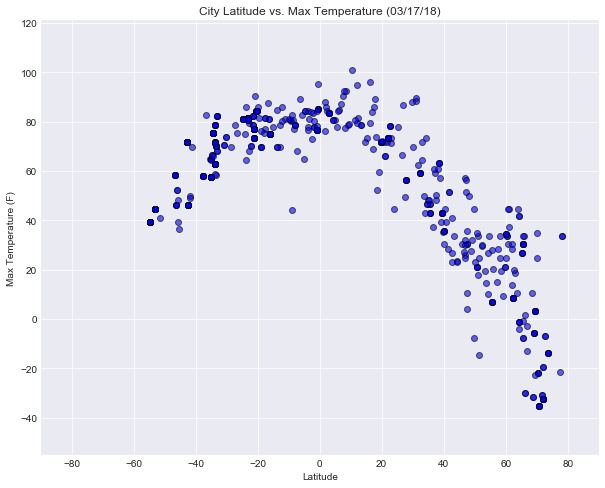

In [8]:
#Use the scatter function
#Draw Latitude vs Temperature Chart
sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(CityWeather['Lat'], CityWeather['Max Temp'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(CityWeather['Max Temp'])-20, max(CityWeather['Max Temp'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (03/17/18)")

# Save png images for each scatter plot.
plt.savefig("CityLat-MaxTemp-03.17.18.png")
plt.show()

## Humidity (%) vs. Latitude

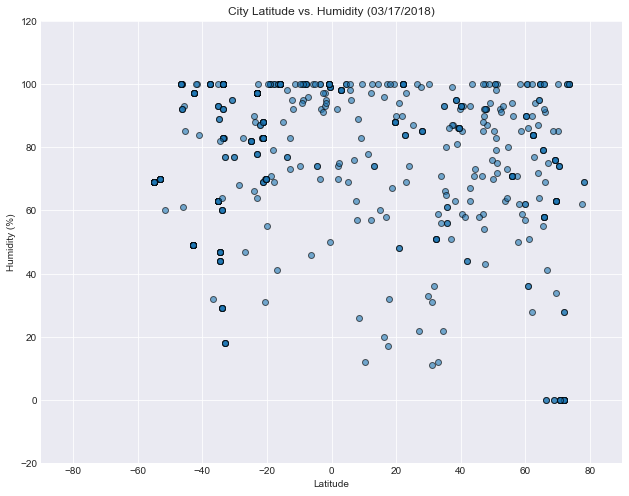

In [9]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Humidity', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Humidity (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Humidity'])-20, max(CityWeather['Humidity'])+20)))
plt.title("City Latitude vs. Humidity (03/17/2018)")

# Save png images for each scatter plot.
plt.savefig("CityLat-Humidity-03.17.18.png")
plt.show()

## Cloudiness (%) vs. Latitude

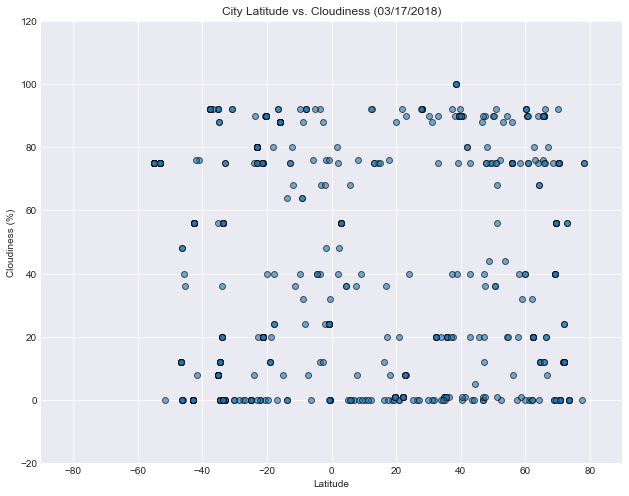

In [10]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Cloudiness', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Cloudiness (%)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Cloudiness'])-20, max(CityWeather['Cloudiness'])+20)))
plt.title("City Latitude vs. Cloudiness (03/17/2018)")

# Save png images for each scatter plot.
plt.savefig("CityLat-Cloudiness-03.17.18.png")
plt.show()

## Wind Speed (mph) vs. Latitude

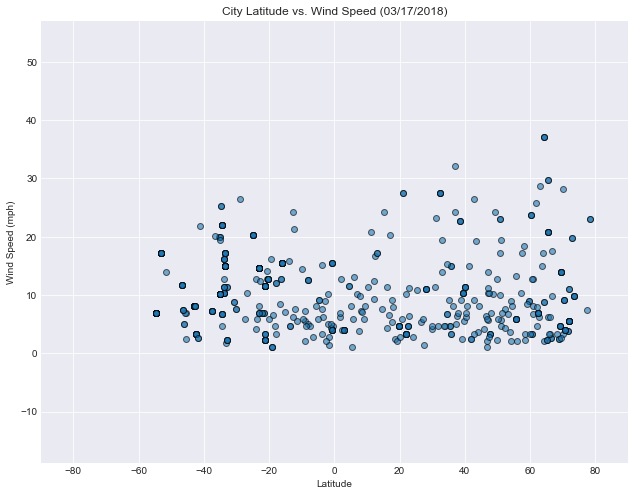

In [11]:
#Use the scatter function
#Draw Latitude vs Humidity Chart - diff method of drawing chart
sns.set_style("darkgrid") 
g = sns.lmplot(x="Lat", y='Wind Speed', data=CityWeather, size = 6.8,
           aspect=1.3,palette="blue", 
           scatter_kws={"alpha":.6,"linewidth":1, 
                        "edgecolor":'black',"marker":'o'}, fit_reg=False)
#Set x and y limits, title, labels
g = (g.set_axis_labels("Latitude","Wind Speed (mph)")
     .set(xlim=(-90, 90), ylim=(min(CityWeather['Wind Speed'])-20, max(CityWeather['Wind Speed'])+20)))
plt.title("City Latitude vs. Wind Speed (03/17/2018)")

# Save png images for each scatter plot.
plt.savefig("CityLat-WindSpeed-03.17.18.png")
plt.show()